In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('gene_expression.csv')

In [3]:
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gene One        3000 non-null   float64
 1   Gene Two        3000 non-null   float64
 2   Cancer Present  3000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 70.4 KB


In [5]:
df.isna().sum()

Gene One          0
Gene Two          0
Cancer Present    0
dtype: int64

### The dataset has no missing data

In [6]:
df['Cancer Present'].value_counts()

Cancer Present
1    1500
0    1500
Name: count, dtype: int64

### The data set has no imbalance class

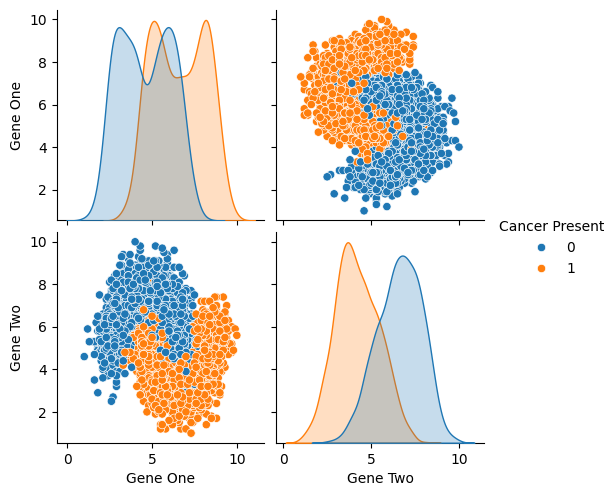

In [7]:
sns.pairplot(data = df, hue = 'Cancer Present');

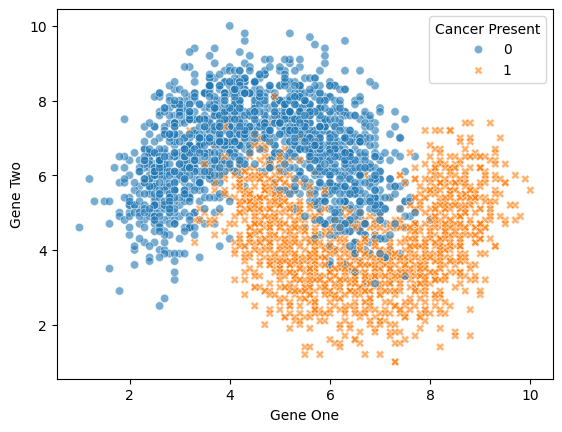

In [8]:
sns.scatterplot(data = df, x = 'Gene One', y = 'Gene Two', 
                hue = 'Cancer Present',
                alpha = 0.6,
                style = 'Cancer Present'
               );

In [9]:
from  sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [10]:
X = df.drop(labels = 'Cancer Present', axis = 1)
y = df['Cancer Present']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [12]:
scaler = StandardScaler()

In [13]:
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [14]:
knn_model = KNeighborsClassifier(n_neighbors= 5)

In [15]:
knn_model.fit(scaled_X_train, y_train)

KNeighborsClassifier()

In [16]:
y_test_pred =  knn_model.predict(scaled_X_test)

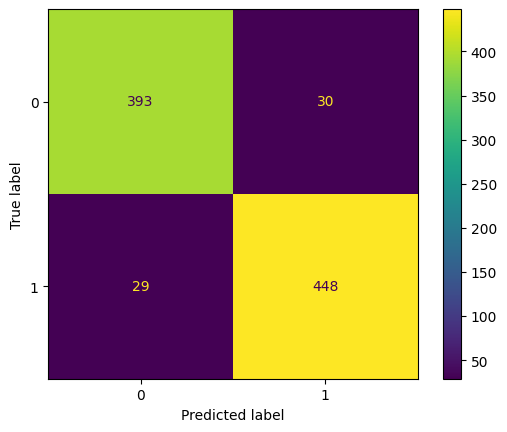

In [17]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_test_pred)).plot()

In [18]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       423
           1       0.94      0.94      0.94       477

    accuracy                           0.93       900
   macro avg       0.93      0.93      0.93       900
weighted avg       0.93      0.93      0.93       900



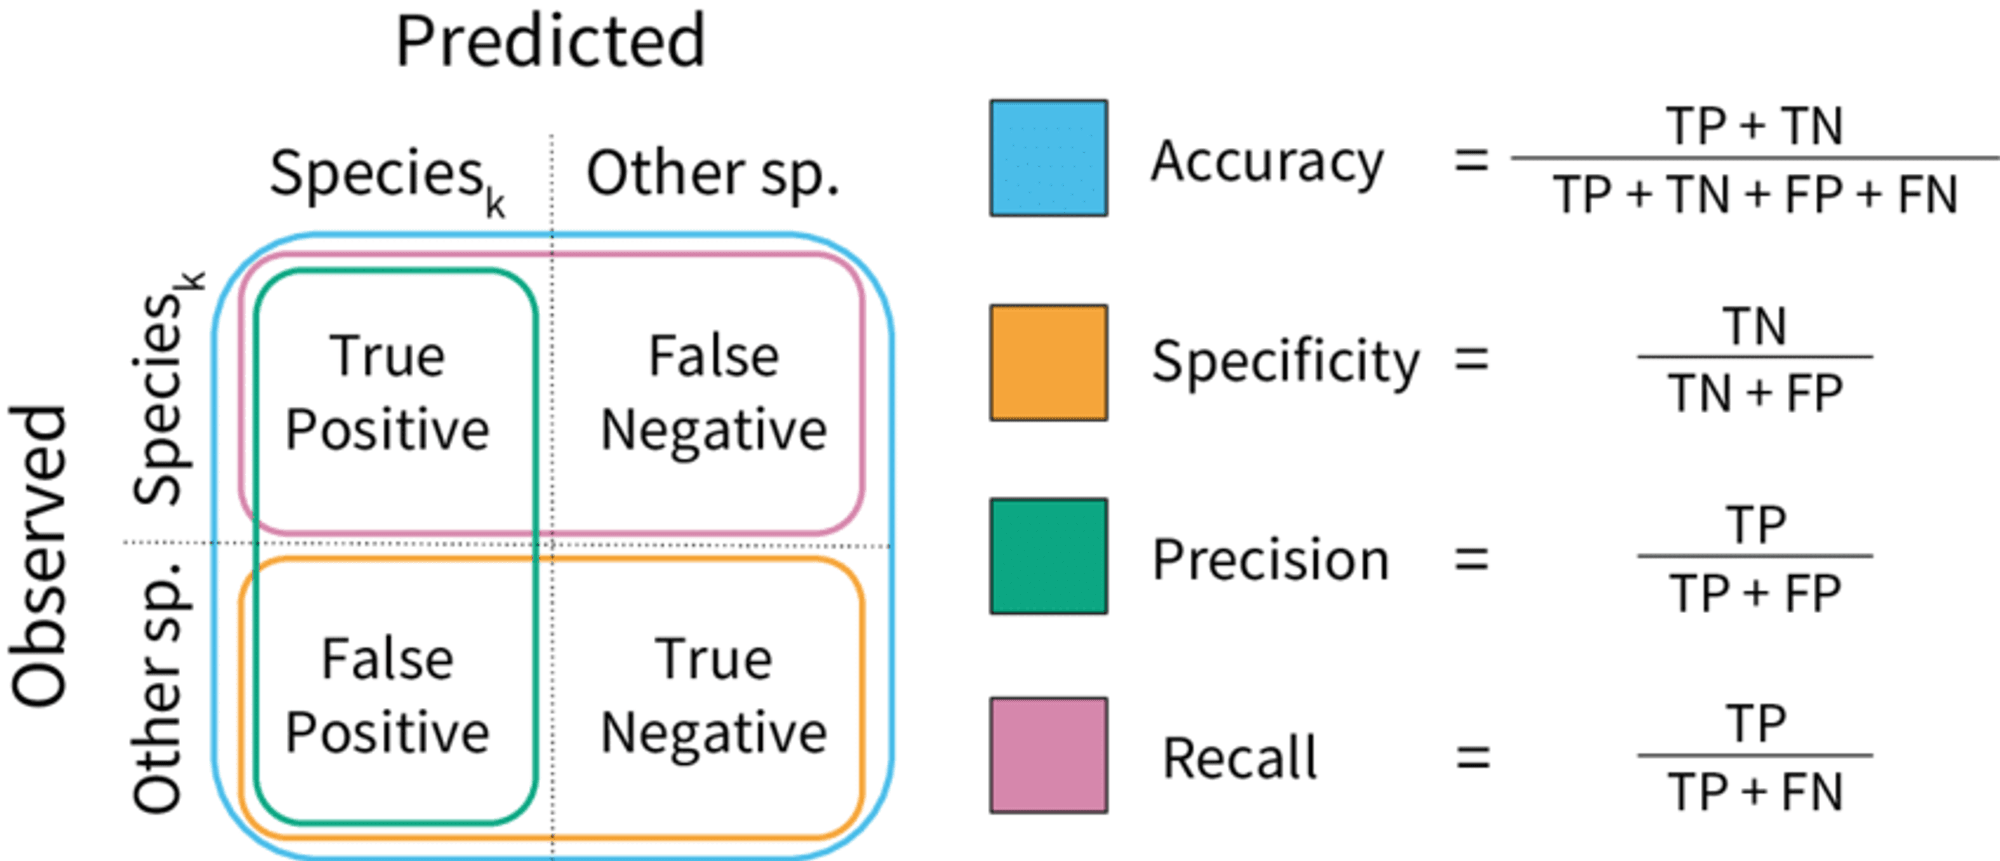

In [19]:
from sklearn.metrics import accuracy_score

In [20]:
1 - accuracy_score(y_test, y_test_pred)

0.06555555555555559

In [21]:
test_error_rates = []

for i in range(1,30):
    model = KNeighborsClassifier(n_neighbors= i)
    model.fit(scaled_X_train, y_train)

    y_test_pred = model.predict(scaled_X_test)
    error_rate = 1 - accuracy_score(y_test, y_test_pred)
    test_error_rates.append(error_rate)

Text(0, 0.5, 'Error rates')

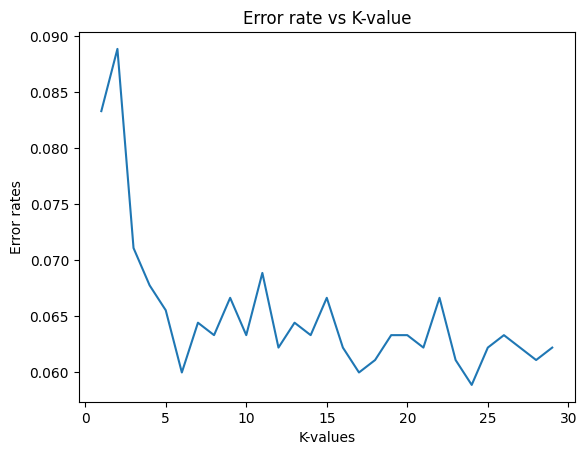

In [22]:
plt.plot(np.arange(1,30), test_error_rates)
plt.title("Error rate vs K-value")
plt.xlabel("K-values")
plt.ylabel("Error rates")
# plt.grid(visible = True)

- From the curve above, around $k = 6$ has the error rate of about $0.06$ which is pretty good
- but at around $k = 24$ the error is below $0.06$
- While choosing a k value it is good to have domain knowlefge on how much error we can accpet
- Based on model we can make trade-off between the model complexity and error rate.
- The model is predicting cancer based on two genes, so we can accept false positive but not false negative. So the error rate is still high for the case
- Lets do the grid search for the model  

In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
base_model = KNeighborsClassifier()

In [29]:
k = np.linspace(1,30, 30, dtype=np.int_)
grid_params = {'n_neighbors' : k}

In [30]:
grid_model = GridSearchCV(estimator= base_model, param_grid=grid_params, cv = 5, verbose = 1)

In [31]:
grid_model.fit(scaled_X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])},
             verbose=1)

In [32]:
y_test_pred = grid_model.predict(scaled_X_test)

In [33]:
grid_model.best_estimator_

KNeighborsClassifier(n_neighbors=np.int64(27))

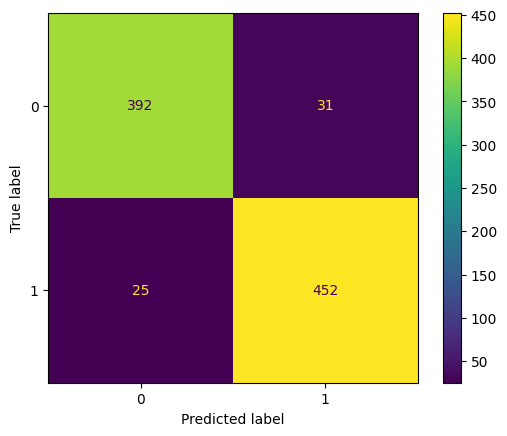

In [35]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_test_pred)).plot()

In [36]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       423
           1       0.94      0.95      0.94       477

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900



> #### Choosing $k = 5$ and $k=37$ (using GridSearch) have improvement of only $0.01\%$. Thus not worthy considering